In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rc
import scipy.io as sio
import os 
import itertools
import re
from matplotlib.patches import Polygon
import scipy.io as sio
import math
import csv
import random
from matplotlib.patches import Polygon
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from scipy.fftpack import fftn, ifftn, fft, ifft
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import signal
import pickle
from sklearn.externals import joblib
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

font = {'family' : 'sans-serif',
        'style' : 'normal',
        'weight' : 'light',
        'size'   : 20}

rc('font', **font)

In [8]:
def load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id):
    mat = sio.loadmat(file_path)
    mat_data = mat[file_name]['daq'][0, 0]
    t = pd.DataFrame(mat_data['t'][0,0], columns = ["timeStamp"])
    data = pd.DataFrame(mat_data['DAQ_DATA'][0, 0], columns = [
        'channel_1',
        'channel_2',
        'channel_3',
        'channel_4',
        'channel_5',
        'channel_6',
        'channel_7',
        'channel_8'
      ])
    #res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False).set_index('TimeStamp')
    res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False)
    res['userID'] = user_id
    res['gamePhase'] = g_phase_id
    res['testPhase'] = phase_id
    res['movementID'] = movement_id
    return res

In [9]:
def generate_df():
    df = pd.DataFrame() # Main DataFrame
    rootdir = os.path.join(os.path.dirname(os.getcwd()) + "/Data_Sets/")
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            list_subdir = subdir.replace(rootdir,"").split("/")
            if (file.endswith(".mat") and (list_subdir[1] != "Game")):
                file_path = os.path.join(subdir, file)
                file_name = file.replace(".mat", "")
                try: 
                    user_id = [s for s in list_subdir if "user" in s][0].replace("user_","")
                    g_phase_id = [s for s in list_subdir if "game" in s][0] # Trainig Phase ID
                    list_fileName = ["".join(x) for _, x in itertools.groupby(file.split("_")[1].replace("Phase", ""), key=str.isdigit)]
                    phase_id = list_fileName[0].replace("Phase", "") 
                    movement_id = re.sub(r"(\w)([A-Z])", r"\1 \2", list_fileName[1])
                except: 
                    print (file_path)
                    print (subdir)
                    print("Error: Please check the Directory's hierarchy -> Corrupt")
                df = df.append(load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id)) 
    return df

In [29]:
df = generate_df()

In [30]:
df

timeStamp  channel_1  channel_2  channel_3  channel_4  channel_5  \
0         0.000   5.000000   0.549096  -5.000000   5.000000  -5.000000   
1         0.001   5.000000   0.344015  -5.000000   5.000000  -5.000000   
2         0.002   5.000000  -0.030747  -5.000000   5.000000  -5.000000   
3         0.003   5.000000  -0.641260  -5.000000   5.000000  -5.000000   
4         0.004   5.000000  -1.571603  -5.000000   5.000000  -5.000000   
5         0.005   5.000000  -2.858549  -5.000000   5.000000  -5.000000   
6         0.006   5.000000  -3.463722  -5.000000   5.000000  -5.000000   
7         0.007   1.562295  -2.568933  -4.977111   4.554894  -5.000000   
8         0.008  -5.000000  -1.012207   5.000000  -5.000000   5.000000   
9         0.009  -5.000000   0.276112   5.000000  -5.000000   5.000000   
10        0.010  -5.000000   1.219577   5.000000  -5.000000   5.000000   
11        0.011  -5.000000   1.777905   5.000000  -5.000000   5.000000   
12        0.012  -5.000000   2.218585   5.000000  -5.000000   5.000000   
13        0.013  -5.000000   2.718624   5.000000  -5.000000   5.000000   
14        0.014  -5.000000   2.290150   5.000000  -5.000000   5.000000   
15        0.015   5.000000   0.788815  -5.000000   5.000000  -5.000000   
16        0.016   5.000000  -0.029221  -5.000000   5.000000  -5.000000   
17        0.017   5.000000   0.179980  -5.000000   5.000000  -5.000000   
18        0.018   5.000000   0.004349  -5.000000   5.000000  -5.000000   
19        0.019   5.000000  -0.514458  -5.000000   5.000000  -5.000000   
20        0.020   5.000000  -0.744106  -5.000000   5.000000  -5.000000   
21        0.021   5.000000  -1.327001  -5.000000   5.000000  -5.000000   
22        0.022   5.000000  -2.400778  -5.000000   5.000000  -5.000000   
23        0.023   5.000000  -3.000153  -5.000000   5.000000  -5.000000   
24        0.024  -5.000000  -2.465171   2.876249  -5.000000   2.207446   
25        0.025  -5.000000  -0.827726   5.000000  -5.000000   5.000000   
26        0.026  -5.000000   0.966125   5.000000  -5.000000   5.000000   
27        0.027  -5.000000   1.754559   5.000000  -5.000000   5.000000   
28        0.028  -5.000000   1.735790   5.000000  -5.000000   5.000000   
29        0.029  -5.000000   1.685130   5.000000  -5.000000   5.000000   
...         ...        ...        ...        ...        ...        ...   
9920      9.920   0.128710  -0.023117   2.951019   0.121843  -0.012894   
9921      9.921  -0.100023  -0.003586   4.186542   0.064622  -0.010300   
9922      9.922  -0.170977  -0.005722   3.742199   0.003891   0.017319   
9923      9.923  -0.147173  -0.051194   3.151369  -0.036088   0.027237   
9924      9.924  -0.157244  -0.059281   2.590753  -0.056382  -0.012284   
9925      9.925  -0.255055   0.033646   3.029450  -0.053941  -0.042039   
9926      9.926  -0.372549   0.092851   3.887770  -0.054551  -0.023117   
9927      9.927  -0.384909   0.030747   1.951553  -0.073320  -0.002060   
9928      9.928  -0.255512  -0.008621  -2.343557  -0.077287  -0.003281   
9929      9.929  -0.056840   0.031052  -4.722744  -0.054093  -0.000687   
9930      9.930   0.130999   0.017319  -4.440299  -0.027237   0.001297   
9931      9.931   0.243000  -0.051041  -3.541390   0.001144  -0.002518   
9932      9.932   0.233082  -0.064469  -2.464714   0.024643   0.017777   
9933      9.933   0.184405  -0.050584  -2.092241   0.030747   0.048295   
9934      9.934   0.240406  -0.036088  -3.122835   0.052110   0.044785   
9935      9.935   0.322347   0.049363  -2.749142   0.090105   0.019150   
9936      9.936   0.250477   0.132677   0.650874   0.060807  -0.008316   
9937      9.937   0.113451   0.075151   3.748760  -0.065995  -0.035325   
9938      9.938   0.042496  -0.023880   4.216907  -0.122148  -0.040513   
9939      9.939  -0.077287  -0.023423   3.466773   0.107347  -0.026474   
9940      9.940  -0.232929  -0.005264   2.624781   0.418631  -0.014878   
9941      9.941  -0.240101  -0.033188   2.390249   0.314107   0.001144   
9942      

In [31]:
# Initiate Moving Window:
# for each user -> Phase 1 -> For each movement -> Window 
# sliding window of size 200 and with 87.5% overlap
# for each user -> Get moving window -> For each moving window compute features -> Put in

In [32]:
def safe_ln(x):
    minval=1e-30
    return np.log(x.clip(minval))

In [33]:
def sliding_windows(d, w, t):
    r = np.arange(len(d))
    s = r[::t]
    z = list(zip(s, s + w))
    f = '{0[0]}:{0[1]}'.format
    g = lambda t: d.iloc[t[0]:t[1]]
    return pd.concat(map(g, z), keys=map(f, z))

In [34]:
def time_domain_descriptors(df):
    # Normalization Factor
    m_lambda = 0.1
    # Root squared zero order moment
    m_0 = np.sqrt((df ** 2).sum()) / m_lambda
    # Root squared second moment
    m_2 = np.sqrt(np.mean(np.diff(df, n = 1, axis = 0) ** 2, axis=0))
    m_2 = pd.DataFrame(m_2, index = m_0.index) / m_lambda
    # Root squared fourth order moment
    m_4 = np.sqrt(np.mean(np.diff(df, n = 2, axis = 0) ** 2, axis=0))
    m_4 = pd.DataFrame(m_4, index = m_0.index) / m_lambda
    # Reshape and Normalize
    m_x = pd.concat([m_0, m_2, m_4], axis=1)
    m_x.columns = ['m_0', 'm_2', 'm_4']
    m_x = m_x / (m_x['m_0'].median())
    # Coefficient of Variation
    m_cov = df.std() / df.mean()
    # Teager–Kaiser energy operator (df[1:-2] -> j / df[2:-1] -> j+1 / df[0:-3] -> j-1)
    m_tke = pd.DataFrame(df[1:-2].values*df[1:-2].values - df[0:-3].values*df[2:-1].values, columns = df.columns, index=df[0:-3].index).sum()
    
    # Signal Time-Domain Descriptors
    f_1 = safe_ln(m_x['m_0'])
    f_2 = safe_ln(m_x['m_0'] - m_x['m_2'])
    f_3 = safe_ln(m_x['m_0'] - m_x['m_4'])
    f_4 = safe_ln(m_x['m_0'] / ((np.sqrt(m_x['m_0'] - m_x['m_4'])*np.sqrt(m_x['m_0'] - m_x['m_4']))))
    f_5 = safe_ln(np.sqrt((m_x['m_0']*m_x['m_0'])/(m_x['m_0']*m_x['m_4'] + 1e-1)))
    f_6 = safe_ln(m_cov)
    f_7 = safe_ln(m_tke) 
    
    df_tdd = pd.concat([f_1, f_2, f_3, f_4, f_5, f_6, f_7], axis=1)
    df_tdd.columns = ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7']
    return df_tdd

In [35]:
def temporal_spatial_features_per_window(df):
    # Build channel differences and expand dataframe
    df_tds = df.copy()
    for ii in df.columns:
        for jj in df.columns:
            if ii != jj:
                index = ii + '-' + jj
                df_tds[index] = df[ii] - df[jj]
    
    tdd_a = time_domain_descriptors(df_tds)
    df_ln = safe_ln(df_tds **2)
    tdd_b = time_domain_descriptors(df_ln)
    df_features = (tdd_a*tdd_b) / (np.sqrt((tdd_b**2).sum()) * np.sqrt((tdd_a**2).sum()))
    return df_features

In [36]:
def temporal_spatial_features(df):
    # Extract relevant data
    df1 = df[(df.testPhase == '2') & (df.gamePhase == 'Pregame')].copy()
    df1.drop (labels = ['gamePhase', 'testPhase', 'timeStamp'], axis = 1, inplace = True)
    
    # Data Frame containing all Temporal Spatial Features for all users for all movements
    df_users_tsf = pd.DataFrame()
        
    # Loop over each user
    for user in np.unique (df1.userID):
        print("Handling User: " + user)
        # Data Frame containing all Temporal Spatial Features for a specific user for all movements
        df_user_tsf = pd.DataFrame()
        
        # Loop over each movement
        for movement in np.unique(df1.movementID):
            # Extract relevant data
            df_movement = df1[(df1.userID == user) & (df1.movementID == movement)].copy()
            df_movement.drop (labels = ['userID', 'movementID'], axis = 1, inplace = True)
            
            # Build sliding windows
            df_windows = sliding_windows(df_movement, 150, 50)
            
            # Data Frame containing all Temporal Spatial Features for all sliding windows for specific movement
            df_movement_tsf = pd.DataFrame()
            
            # Loop over each window
            for window_index in np.unique([index[:][0] for index in df_windows.index]):
                # Extract data of specific window
                df_window = df_windows.loc[window_index]
                # Extract Temporal Spatial Feature of specific window
                df_window_tsf = temporal_spatial_features_per_window(df_window)
                # Add sub_index for more clarity
                df_window_tsf['window'] = window_index
                df_window_tsf.set_index('window', append=True, inplace=True)
                # Append features of specific window to df_windows_tsf
                df_movement_tsf = df_movement_tsf.append(df_window_tsf)
                
            # Restructure df_windows_tsf for more clarity
            df_movement_tsf['movementID'] = movement
            df_movement_tsf.set_index('movementID', append=True, inplace=True)
            df_movement_tsf.index.names = ['subfeature', 'window', 'movementID']
            df_movement_tsf.columns.names = ['feature']
            df_movement_tsf = df_movement_tsf.pivot_table(
                        index=['movementID', 'window'], 
                        columns=['subfeature'], 
                        aggfunc=np.sum)
            
            # Append feature of specific movement to df_user_tsr
            df_user_tsf = df_user_tsf.append(df_movement_tsf)
        
        df_user_tsf['userID'] = user
        df_user_tsf.set_index('userID', append=True, inplace=True)
        df_users_tsf = df_users_tsf.append(df_user_tsf)
    df_users_tsf = df_users_tsf.reorder_levels(['userID', 'movementID', 'window'])
    print("Done")
    return df_users_tsf

In [37]:
df_features = temporal_spatial_features(df)

Handling User: 20181018T150232_Kevin
Handling User: 20181018T164607_Danyan
Handling User: 20181018T170849_Varun
Handling User: 20181023T145214_Cody
Handling User: 20181023T152814_Brian
Handling User: 20181106T142811
Handling User: 20181106T172825
Handling User: 20181106T185611
Handling User: 20181106T195550
Handling User: 20181107T175945
Handling User: 20181107T184845
Handling User: 20181108T173019
Handling User: 20181112T171705
Handling User: 20181112T183527
Handling User: 20181113T144813
Handling User: 20181113T170730
Handling User: 20181119T181351
Handling User: 20181126T133411
Handling User: 20181126T144043
Handling User: 20181126T165124
Done


In [38]:
df_features.columns = df_features.columns.map('_'.join)
df_features = df_features.reset_index(level=['userID', 'movementID', 'window'])
df_features.to_csv("mohamed_extracted_features_phase_2.csv", index=False)

In [39]:
df = pd.read_csv("mohamed_extracted_features_phase_2.csv")

In [40]:
# Change appropriate columns to either floats or ints
df[df.columns.difference(['movementID','userID','window'])] = df[df.columns.difference(['movementID','userID','window'])].apply(pd.to_numeric)

In [41]:
df

userID               movementID      window  \
0      20181018T150232_Kevin           Fully Extended       0:150   
1      20181018T150232_Kevin           Fully Extended   1000:1150   
2      20181018T150232_Kevin           Fully Extended     100:250   
3      20181018T150232_Kevin           Fully Extended   1050:1200   
4      20181018T150232_Kevin           Fully Extended   1100:1250   
5      20181018T150232_Kevin           Fully Extended   1150:1300   
6      20181018T150232_Kevin           Fully Extended   1200:1350   
7      20181018T150232_Kevin           Fully Extended   1250:1400   
8      20181018T150232_Kevin           Fully Extended   1300:1450   
9      20181018T150232_Kevin           Fully Extended   1350:1500   
10     20181018T150232_Kevin           Fully Extended   1400:1550   
11     20181018T150232_Kevin           Fully Extended   1450:1600   
12     20181018T150232_Kevin           Fully Extended   1500:1650   
13     20181018T150232_Kevin           Fully Extended     150:300   
14     20181018T150232_Kevin           Fully Extended   1550:1700   
15     20181018T150232_Kevin           Fully Extended   1600:1750   
16     20181018T150232_Kevin           Fully Extended   1650:1800   
17     20181018T150232_Kevin           Fully Extended   1700:1850   
18     20181018T150232_Kevin           Fully Extended   1750:1900   
19     20181018T150232_Kevin           Fully Extended   1800:1950   
20     20181018T150232_Kevin           Fully Extended   1850:2000   
21     20181018T150232_Kevin           Fully Extended   1900:2050   
22     20181018T150232_Kevin           Fully Extended   1950:2100   
23     20181018T150232_Kevin           Fully Extended   2000:2150   
24     20181018T150232_Kevin           Fully Extended     200:350   
25     20181018T150232_Kevin           Fully Extended   2050:2200   
26     20181018T150232_Kevin           Fully Extended   2100:2250   
27     20181018T150232_Kevin           Fully Extended   2150:2300   
28     20181018T150232_Kevin           Fully Extended   2200:2350   
29     20181018T150232_Kevin           Fully Extended   2250:2400   
...                      ...                      ...         ...   
12057        20181126T165124  Ninety Degrees Wrinkled   8600:8750   
12058        20181126T165124  Ninety Degrees Wrinkled   8650:8800   
12059        20181126T165124  Ninety Degrees Wrinkled   8700:8850   
12060        20181126T165124  Ninety Degrees Wrinkled   8750:8900   
12061        20181126T165124  Ninety Degrees Wrinkled   8800:8950   
12062        20181126T165124  Ninety Degrees Wrinkled   8850:9000   
12063        20181126T165124  Ninety Degrees Wrinkled   8900:9050   
12064        20181126T165124  Ninety Degrees Wrinkled   8950:9100   
12065        20181126T165124  Ninety Degrees Wrinkled   9000:9150   
12066        20181126T165124  Ninety Degrees Wrinkled    900:1050   
12067        20181126T165124  Ninety Degrees Wrinkled   9050:9200   
12068        20181126T165124  Ninety Degrees Wrinkled   9100:9250   
12069        20181126T165124  Ninety Degrees Wrinkled   9150:9300   
12070        20181126T165124  Ninety Degrees Wrinkled   9200:9350   
12071        20181126T165124  Ninety Degrees Wrinkled   9250:9400   
12072        20181126T165124  Ninety Degrees Wrinkled   9300:9450   
12073        20181126T165124  Ninety Degrees Wrinkled   9350:9500   
12074        20181126T165124  Ninety Degrees Wrinkled   9400:9550   
12075        20181126T165124  Ninety Degrees Wrinkled   9450:9600   
12076        20181126T165124  Ninety Degrees Wrinkled   9500:9650   
12077        20181126T165124  Ninety Degrees Wrinkled    950:1100   
12078        20181126T165124  Ninety Degrees Wrinkled   9550:9700   
12079        20181126T165124  Ninety Degrees Wrinkled   9600:9750   
12080        20181126T165124  Ninety Degrees Wrinkled   9650:9800   
12081        20181126T165124  Ninety Degrees Wrinkled   9700:9850   
12082        20181126T165124  Ninety Degrees Wrinkled   9750:9900   
12083        2018112

## Training Setup

In [42]:
def split_train_test():
    user_ids = (np.unique(df.userID))
    random.Random(4).shuffle(user_ids)
    train_user_ids = []
    test_user_ids = []
    for user_index in range(0,int(math.ceil(len(user_ids)*0.75))):
        train_user_ids.append(user_ids[user_index])
    for user_index in range(int(math.ceil(len(user_ids)*0.75)),len(user_ids)):
        test_user_ids.append(user_ids[user_index])
    return train_user_ids,test_user_ids
train_user_ids,test_user_ids = split_train_test()

In [43]:
# TODO Change skf split based on this value
print(train_user_ids)

['20181126T133411', '20181126T165124', '20181107T184845', '20181113T144813', '20181106T142811', '20181126T144043', '20181119T181351', '20181108T173019', '20181023T152814_Brian', '20181106T195550', '20181106T172825', '20181018T150232_Kevin', '20181112T183527', '20181018T164607_Danyan', '20181018T170849_Varun']


In [44]:
def cross_validation_split(train_user_ids):
    train_slice = df.loc[df['userID'].isin(train_user_ids)]
    train_slice_kfold_y = train_slice['userID']
    
    skf = StratifiedKFold(n_splits=10)
    return skf
skf_train = cross_validation_split(train_user_ids)

In [45]:
# Contains correct train test split code for this purpose
def phase1_split_data_v2(train_user_ids,test_user_ids):
    phase1_df = df
    data = phase1_df.copy()
    train_slice = data.loc[data['userID'].isin(train_user_ids)]
    test_slice = data.loc[data['userID'].isin(test_user_ids)]
    train = train_slice.copy()
    test = test_slice.copy()
    y_train = train['movementID']
    y_test = test['movementID']
    train.drop(labels=['userID','movementID','window'], axis=1, inplace=True)
    test.drop(labels=['userID','movementID','window'], axis=1, inplace=True)
    return train, test, y_train, y_test

In [46]:
X_train, X_test, y_train, y_test = phase1_split_data_v2(train_user_ids, test_user_ids)

## Utility Functions

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Classifiers

## Random Forest

In [47]:
def random_forest_all_users_v2():
    r_clf = RandomForestClassifier(n_estimators=300)
    parameter_grid = {'min_samples_split':[3,5],
                      'max_depth':[120,150]}
    clf = GridSearchCV(r_clf, parameter_grid, cv=skf_train)
    clf.fit(X_train, y_train)
    print("Best Parameters are: " + str(clf.best_params_))
    print("Cross Validation Score is: " + str(clf.best_score_))
    print("Prediction Score is: " + str(clf.score(X_test, y_test)))
    return clf.best_estimator_

model_1 = random_forest_all_users_v2()

Best Parameters are: {'max_depth': 120, 'min_samples_split': 3}
Cross Validation Score is: 0.814827314659
Prediction Score is: 0.244215134459


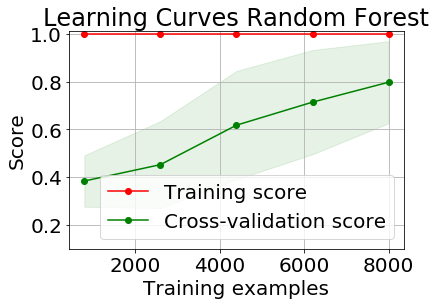

In [50]:
# Plot Results

title = "Learning Curves Random Forest"
plot_learning_curve(model_1, title, X_train, y_train, ylim=(0.1, 1.01), cv=skf_train)

plt.show()

In [19]:
joblib.dump(model_1, 'saved_model_python_3_cv_10_depth_120_min_split_3_train_15.pkl')

['saved_model_python_3_cv_10_depth_120_min_split_3_train_15.pkl']

In [20]:
model_1_reload = joblib.load('saved_model_python_3_cv_10_depth_120_min_split_3_train_15.pkl')

In [22]:
print("Prediction Score is: " + str(model_1_reload.score(X_test, y_test)))

Prediction Score is: 0.35538373425
